In [2]:
import torch
import torchvision
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import SGD, Adam

In [3]:
data_folder = '~/data/FMNIST'
data = torchvision.datasets.FashionMNIST(root=data_folder, train=True, download=True)

In [4]:
class FMNISTDataset(Dataset):
    def __init__(self, x: torch.Tensor, y: torch.Tensor):
        x = x.float() / 255
        x = x.view(-1, 1, 28, 28)
        self.x, self.y = x, y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        x, y = self.x[index], self.y[index]
        return x.to('cuda'), y.to('cuda')
        

In [5]:
def get_model():
    model = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=64),
        nn.MaxPool2d(kernel_size=2),
        nn.ReLU(),
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),
        nn.MaxPool2d(kernel_size=2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(in_features=3200, out_features=256),
        nn.ReLU(),
        nn.Linear(in_features=256, out_features=10)
        ).to('cuda')
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

In [6]:
from imgaug import augmenters as iaa

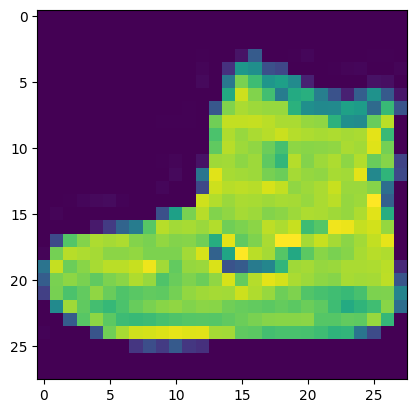

In [7]:
import matplotlib.pyplot as plt

data.data[0]
plt.imshow(data.data[0])

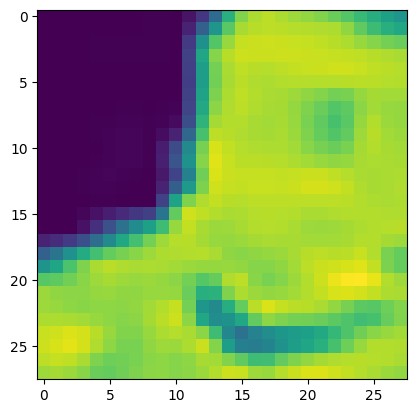

In [9]:
from imgaug import augmenters as iaa
import numpy as np


tr_images = data.data
tr_targets = data.targets
aug = iaa.Affine(scale=2)
img = np.array(tr_images[0])
plt.imshow(aug.augment_image(img))
